In [1]:
# importing the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
dataset = pd.read_excel("Heart_attack.xlsx")
dataset.head()

,_STATE,DISPCODE,CADULT1,SEXVAR,GENHLTH,MEDCOST1,EXERANY2,EXRACT12,MARITAL,EDUCA,EMPLOY1,_IMPRACE,BPHIGH6,BPMEDS1,TOLDHI3,CHOLMED3,CVDINFR4,?
0,1,1100,NaN,2,2,2,2,NaN,1,5,7.0,1,1,1.0,2.0,2.0,2,2
1,1,1100,NaN,2,2,2,1,1.0,2,5,7.0,1,1,2.0,1.0,1.0,2,2
2,1,1100,NaN,2,4,1,1,1.0,3,4,7.0,2,1,1.0,1.0,1.0,2,2
3,1,1100,NaN,2,2,2,1,1.0,1,5,7.0,1,3,NaN,2.0,2.0,2,2
4,1,1100,NaN,2,4,2,1,1.0,3,5,8.0,1,1,1.0,2.0,2.0,2,2


In [3]:
data_dictionary = {
    "_STATE": "State code identifier",
    "DISPCODE": "Display code or survey-related identifier",
    "CADULT1": "Indicator for coronary artery disease history (e.g., 1 for Yes, 2 for No, NaN for missing)",
    "SEXVAR": "Gender of respondent (e.g., 1 for Male, 2 for Female)",
    "GENHLTH": "General health status indicator (e.g., 1 for Excellent, 2 for Very Good, etc.)",
    "MEDCOST1": "Indicator if medical costs were a burden (e.g., 1 for Yes, 2 for No)",
    "EXERANY2": "Exercise indicator (e.g., 1 for Yes, 2 for No)",
    "EXRACT12": "Exercise activity level indicator",
    "MARITAL": "Marital status of respondent",
    "EDUCA": "Education level (e.g., 1 for Less than high school, 2 for High school graduate, etc.)",
    "EMPLOY1": "Employment status",
    "_IMPRACE": "Imputed race identifier",
    "BPHIGH6": "Indicator for history of high blood pressure",
    "BPMEDS1": "Indicator if respondent is on blood pressure medication",
    "TOLDHI3": "Indicator for history of high cholesterol",
    "CHOLMED3": "Indicator if respondent is on cholesterol medication",
    "CVDINFR4": "Indicator for history of cardiovascular infarction (e.g., 1 for Yes, 2 for No)",
    "?": "Unlabeled variable or unknown purpose"
}

# Print the data dictionary with aligned keys
print("Data Dictionary for Heart Attack Dataset:\n")
for key, value in data_dictionary.items():
    print(f"{key.ljust(12)}: {value}")

Data Dictionary for Heart Attack Dataset:

_STATE      : State code identifier
DISPCODE    : Display code or survey-related identifier
CADULT1     : Indicator for coronary artery disease history (e.g., 1 for Yes, 2 for No, NaN for missing)
SEXVAR      : Gender of respondent (e.g., 1 for Male, 2 for Female)
GENHLTH     : General health status indicator (e.g., 1 for Excellent, 2 for Very Good, etc.)
MEDCOST1    : Indicator if medical costs were a burden (e.g., 1 for Yes, 2 for No)
EXERANY2    : Exercise indicator (e.g., 1 for Yes, 2 for No)
EXRACT12    : Exercise activity level indicator
MARITAL     : Marital status of respondent
EDUCA       : Education level (e.g., 1 for Less than high school, 2 for High school graduate, etc.)
EMPLOY1     : Employment status
_IMPRACE    : Imputed race identifier
BPHIGH6     : Indicator for history of high blood pressure
BPMEDS1     : Indicator if respondent is on blood pressure medication
TOLDHI3     : Indicator for history of high cholesterol
CHOLMED3 

In [4]:
# Summary statistics for the dataset
summary_stats = dataset.describe()
summary_stats

,_STATE,DISPCODE,CADULT1,SEXVAR,GENHLTH,MEDCOST1,EXERANY2,EXRACT12,MARITAL,EDUCA,EMPLOY1,_IMPRACE,BPHIGH6,BPMEDS1,TOLDHI3,CHOLMED3,CVDINFR4,?
count,71218.000000,71218.000000,55716.0,71218.000000,71218.000000,71218.000000,71218.000000,54019.000000,71218.000000,71218.000000,70662.000000,71218.000000,71218.000000,29012.000000,63226.000000,63218.000000,71218.000000,71218.000000
mean,6.604749,1119.530175,1.0,1.531495,2.631638,1.930299,1.257688,4.353579,2.475034,5.084192,4.048527,1.922477,2.209090,1.209224,1.620283,1.704689,1.980665,1.996700
std,3.173530,39.643560,0.0,0.499011,1.096111,0.445020,0.547746,7.680474,1.850303,1.078215,2.888773,1.600015,1.064745,0.539502,0.739056,0.629284,0.481285,0.569061
min,1.000000,1100.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,1100.000000,1.0,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
50%,6.000000,1100.000000,1.0,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,5.000000,4.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000
75%,9.000000,1100.000000,1.0,2.000000,3.000000,2.000000,1.000000,8.000000,4.000000,6.000000,7.000000,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000
max,12.000000,1200.000000,1.0,2.000000,9.000000,9.000000,9.000000,99.000000,9.000000,9.000000,9.000000,6.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


### Descriptive Statistics
- The dataset has columns with a range of values, including categorical variables represented by numerical codes
- Several columns have higher maximum values, like `GENHLTH`, `EXERANY2`, and `EXRACT12` suggesting possible outliers or placeholder codes for missing data.

In [5]:
# Checking for missing values in the dataset
missing_values = dataset.isnull().sum()
missing_values

_STATE          0
DISPCODE        0
CADULT1     15502
SEXVAR          0
GENHLTH         0
MEDCOST1        0
EXERANY2        0
EXRACT12    17199
MARITAL         0
EDUCA           0
EMPLOY1       556
_IMPRACE        0
BPHIGH6         0
BPMEDS1     42206
TOLDHI3      7992
CHOLMED3     8000
CVDINFR4        0
?               0
dtype: int64

### Missing Values
Columns with notable missing values include:
- **CADULT1**: 15,502 missing values
- **EXRACT12**: 17199 missing values
- **EMPLOY1**: 556 missing values
- **BPMEDS1**: 42206 missing values
- **TOLDHI3**: 7992 missing values
- **CHOLMED3**: 8000 missing values

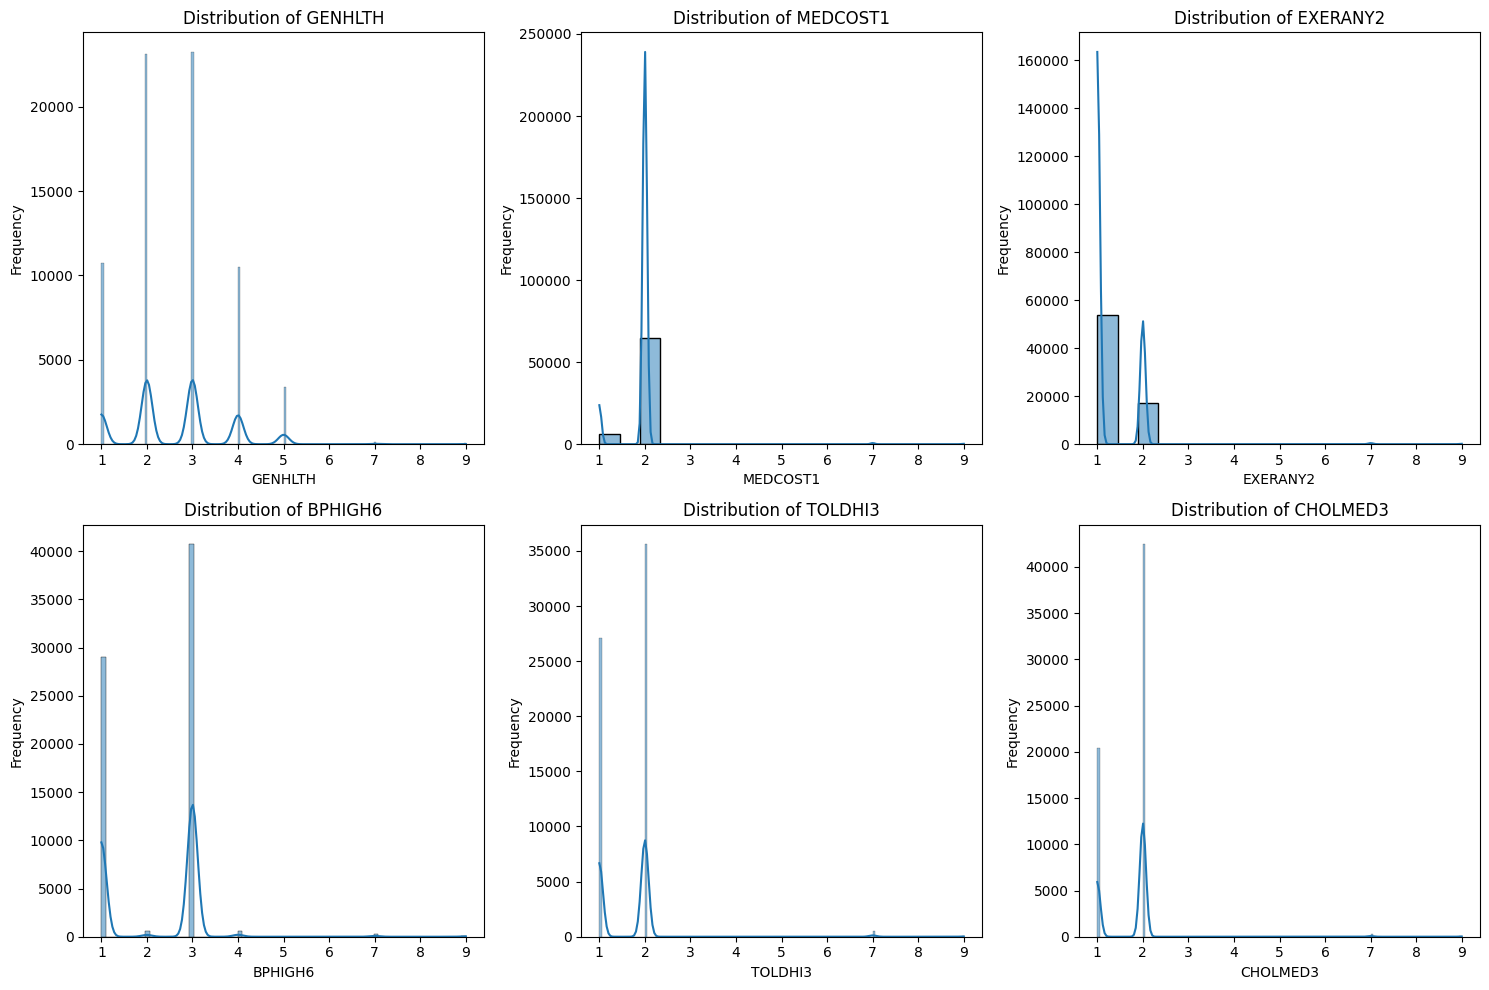

In [6]:
# Setting up the plot style
plt.style.use('default')

# Plotting distributions for a few selected columns
plt.figure(figsize=(15, 10))
cols_to_plot = ['GENHLTH', 'MEDCOST1', 'EXERANY2', 'BPHIGH6', 'TOLDHI3', 'CHOLMED3']
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(dataset[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

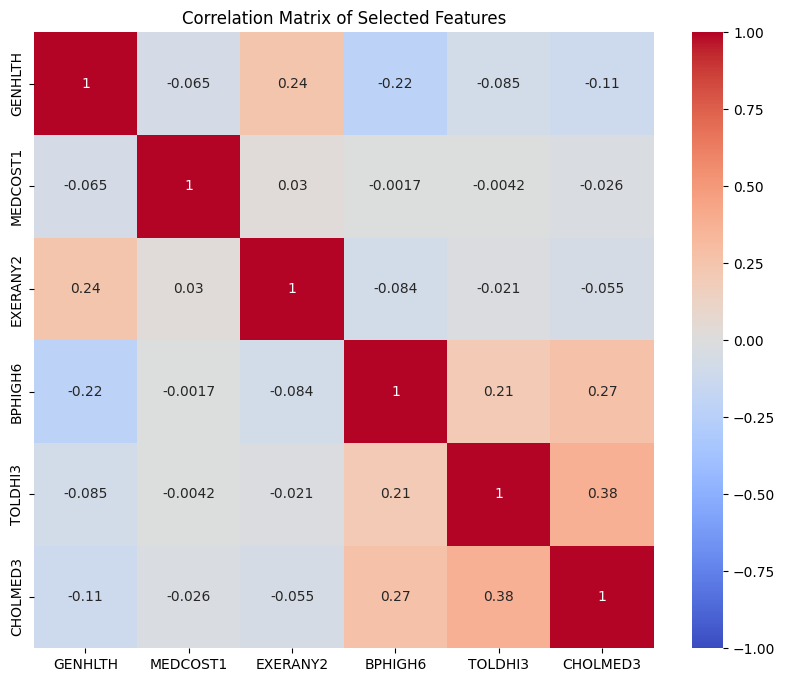

In [7]:
# Calculate correlations among numerical columns
correlation_matrix = dataset[cols_to_plot].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Features')
plt.show()

### Correlation
- **BPHIGH6** (blood pressure) and **TOLDHI3** (history oif high cholesterol) have a notable positive correlation, suggesting that individuals with high blood pressure may also have a history of high cholesterol
- Other features have weaker correlations, indicating they may not be strongly related in this dataset

In [8]:
# Define categorical columns for frequency analysis and visualization
categorical_cols = ['SEXVAR', 'GENHLTH', 'MEDCOST1', 'EXERANY2', 'MARITAL', 'EDUCA', 'EMPLOY1']
numerical_cols = ['CADULT1', 'BPHIGH6', 'BPMEDS1', 'TOLDHI3', 'CHOLMED3', 'EXRACT12']

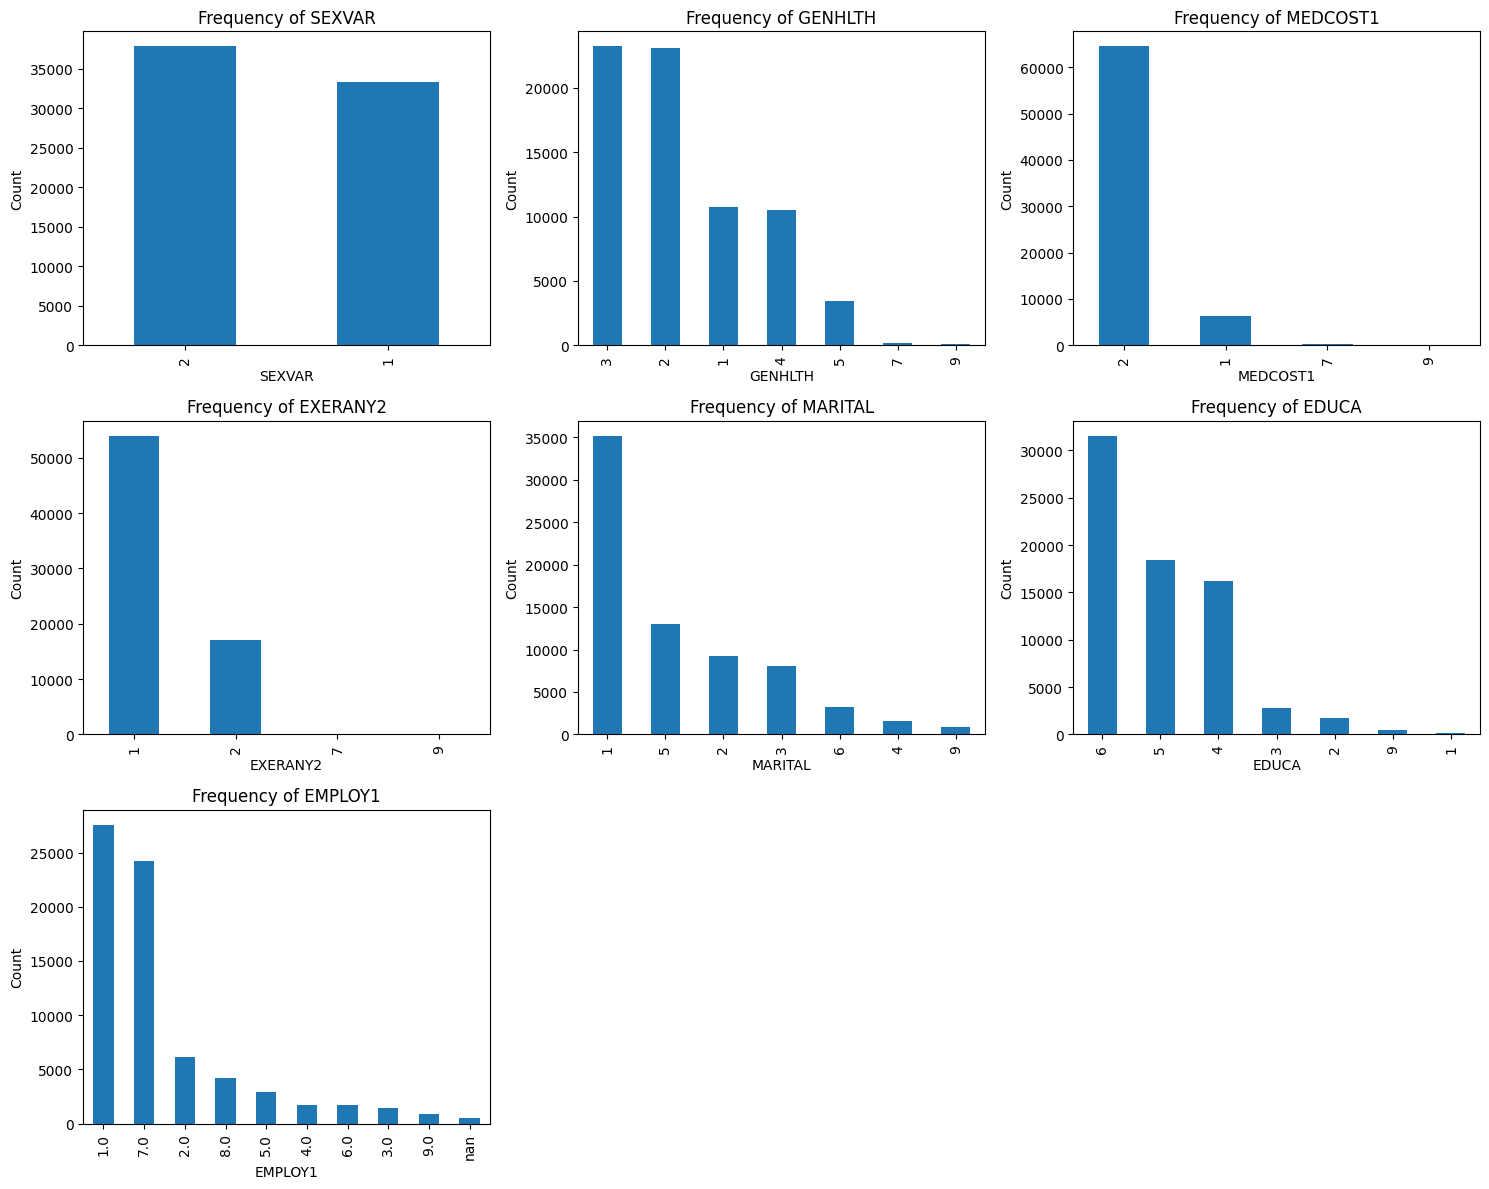

In [9]:
# Plotting frequency of categorical variables
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    dataset[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

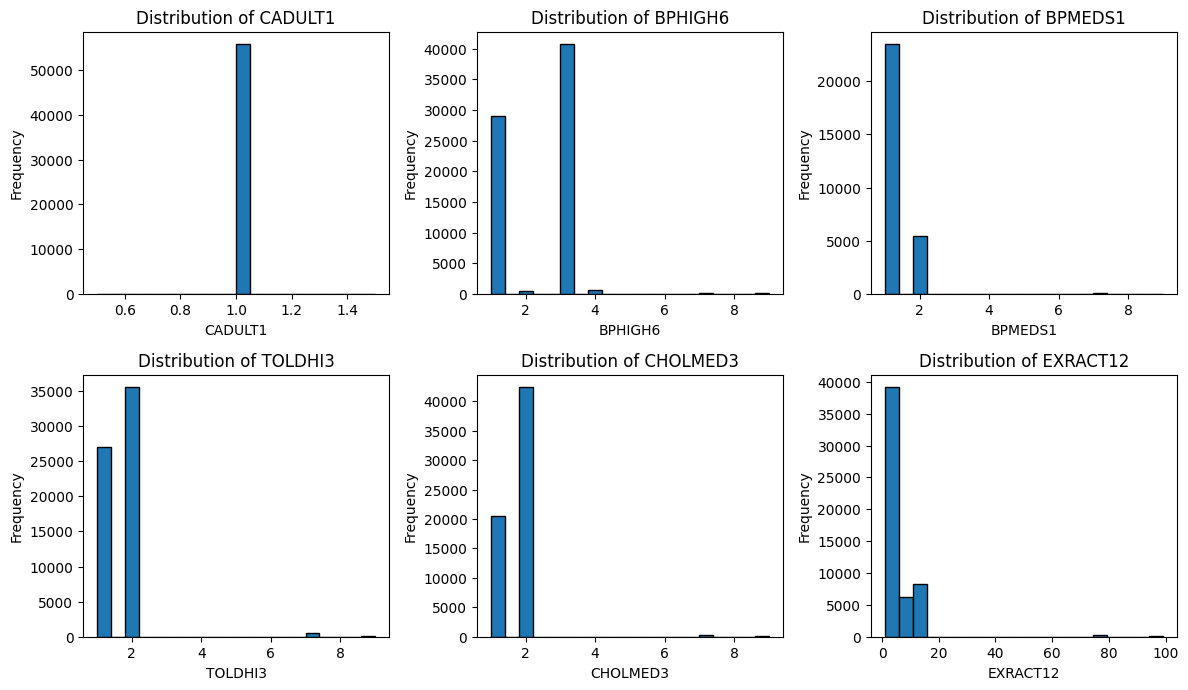

In [10]:
# Plotting histograms for numerical variables to explore distributions
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(dataset[col].dropna(), bins=20, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

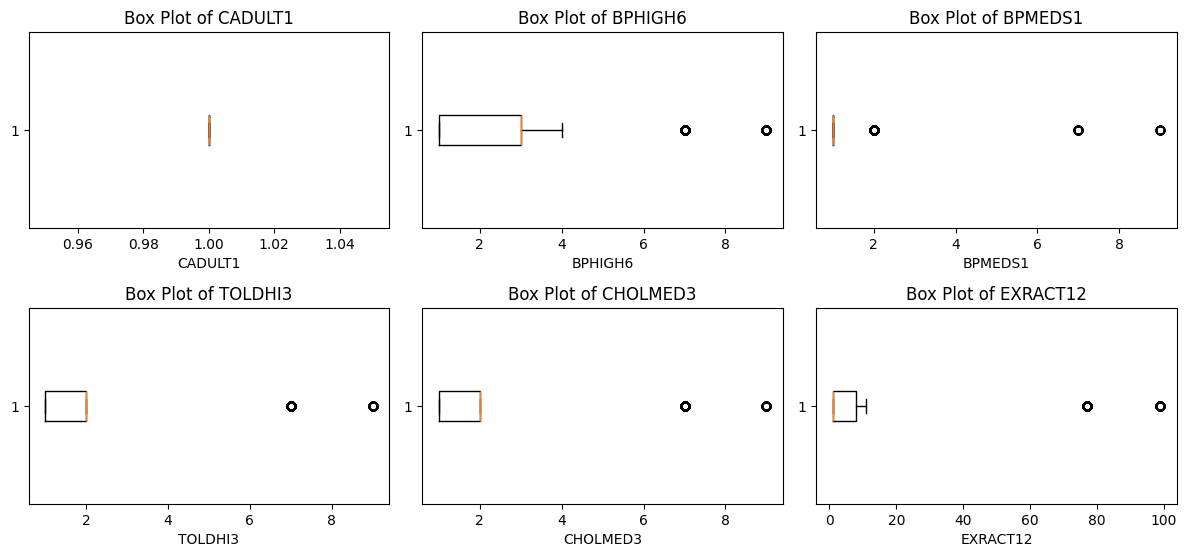

In [11]:
# Plotting box plots for outlier detection in the numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(dataset[col].dropna(), vert=False)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [12]:
# Function to calculate outliers based on IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [13]:
# Detecting outliers and summarizing results for numerical columns
def outlier_check(dataset):
    outlier_summary = {}
    for col in numerical_cols:
        outliers, lower_bound, upper_bound = detect_outliers(dataset, col)
        outlier_summary[col] = {
            'Num_Outliers': len(outliers),
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound,
            'Outlier_Values': outliers[col].unique()
        }
    return outlier_summary

In [14]:
outlier_check(dataset)

{'CADULT1': {'Num_Outliers': 0,
  'Lower_Bound': 1.0,
  'Upper_Bound': 1.0,
  'Outlier_Values': array([], dtype=float64)},
 'BPHIGH6': {'Num_Outliers': 356,
  'Lower_Bound': -2.0,
  'Upper_Bound': 6.0,
  'Outlier_Values': array([7, 9], dtype=int64)},
 'BPMEDS1': {'Num_Outliers': 5542,
  'Lower_Bound': 1.0,
  'Upper_Bound': 1.0,
  'Outlier_Values': array([2., 7., 9.])},
 'TOLDHI3': {'Num_Outliers': 575,
  'Lower_Bound': -0.5,
  'Upper_Bound': 3.5,
  'Outlier_Values': array([7., 9.])},
 'CHOLMED3': {'Num_Outliers': 324,
  'Lower_Bound': -0.5,
  'Upper_Bound': 3.5,
  'Outlier_Values': array([7., 9.])},
 'EXRACT12': {'Num_Outliers': 380,
  'Lower_Bound': -9.5,
  'Upper_Bound': 18.5,
  'Outlier_Values': array([99., 77.])}}

### Outlier
- **BPHIGH6:**
    - 356 outliers
    - Outlier values: 7 and 9
    - Bounds: values outside of the range [-2; 6] are consider outliers

- **BPMEDS1:**
    - 5542 outliers
    - Outlier values: 2, 7, and 9
    - Bounds: values different from 1 are outliers, indicating that 1 is likely the expected response

- **TOLDHI3:**
    - 575 outliers
    - Outlier values: 7 and 9
    - Bounds: Values outside of the range [-0.5; 3.5] are consider outliers

- **CHOLMED3:**
    - 324 outliers
    - Outlier values: 7 and 9
    - Bounds: Values outside of the range [-0.5; 3.5] are consider outliers

The outlier values `7 and 9` appear across multiple variables and represent placeholder codes for "unknown" or "not applicable". These could be cleaned or inputed based on context. \
Imputing data with the median of the column.

In [15]:
# Impute outliers with the median of each column for the identified outlier values (7 and 9)
for col in numerical_cols:
    median_value = dataset[col].median()
    dataset[col] = dataset[col].replace([7, 9], median_value)

# Verify if the outliers have been replaced
outlier_check(dataset)


{'CADULT1': {'Num_Outliers': 0,
  'Lower_Bound': 1.0,
  'Upper_Bound': 1.0,
  'Outlier_Values': array([], dtype=float64)},
 'BPHIGH6': {'Num_Outliers': 0,
  'Lower_Bound': -2.0,
  'Upper_Bound': 6.0,
  'Outlier_Values': array([], dtype=int64)},
 'BPMEDS1': {'Num_Outliers': 5450,
  'Lower_Bound': 1.0,
  'Upper_Bound': 1.0,
  'Outlier_Values': array([2.])},
 'TOLDHI3': {'Num_Outliers': 0,
  'Lower_Bound': -0.5,
  'Upper_Bound': 3.5,
  'Outlier_Values': array([], dtype=float64)},
 'CHOLMED3': {'Num_Outliers': 0,
  'Lower_Bound': -0.5,
  'Upper_Bound': 3.5,
  'Outlier_Values': array([], dtype=float64)},
 'EXRACT12': {'Num_Outliers': 9529,
  'Lower_Bound': -3.5,
  'Upper_Bound': 8.5,
  'Outlier_Values': array([10., 11., 99., 77.])}}

In [16]:
# Handling missing values by imputing categorical columns with mode and numerical columns with median

# Impute categorical columns with mode
for col in categorical_cols:
    mode_value = dataset[col].mode()[0]  # Mode returns a series, so we select the first value
    dataset[col] = dataset[col].fillna(mode_value)

# Impute numerical columns with median
for col in numerical_cols:
    median_value = dataset[col].median()
    dataset[col] = dataset[col].fillna(median_value)

# Checking for missing values in the dataset
missing_values = dataset.isnull().sum()
missing_values

_STATE      0
DISPCODE    0
CADULT1     0
SEXVAR      0
GENHLTH     0
MEDCOST1    0
EXERANY2    0
EXRACT12    0
MARITAL     0
EDUCA       0
EMPLOY1     0
_IMPRACE    0
BPHIGH6     0
BPMEDS1     0
TOLDHI3     0
CHOLMED3    0
CVDINFR4    0
?           0
dtype: int64